In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier()

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/tiepvupsu/DecisionTreeID3/master/weather.csv')
print(df.shape)
df.head()

(14, 6)


,id,outlook,temperature,humidity,wind,play
0,1,sunny,hot,high,weak,no
1,2,sunny,hot,high,strong,no
2,3,overcast,hot,high,weak,yes
3,4,rainy,mild,high,weak,yes
4,5,rainy,cool,normal,weak,yes


In [4]:
df = df.drop(columns=["id"])
data = pd.get_dummies(df, columns=['outlook', 'temperature','humidity','wind'])
data

,play,outlook_overcast,outlook_rainy,outlook_sunny,temperature_cool,temperature_hot,temperature_mild,humidity_high,humidity_normal,wind_strong,wind_weak
0,no,0,0,1,0,1,0,1,0,0,1
1,no,0,0,1,0,1,0,1,0,1,0
2,yes,1,0,0,0,1,0,1,0,0,1
3,yes,0,1,0,0,0,1,1,0,0,1
4,yes,0,1,0,1,0,0,0,1,0,1
5,no,0,1,0,1,0,0,0,1,1,0
6,yes,1,0,0,1,0,0,0,1,1,0
7,no,0,0,1,0,0,1,1,0,0,1
8,yes,0,0,1,1,0,0,0,1,0,1
9,yes,0,1,0,0,0,1,0,1,0,1


In [5]:
features = data.columns
target = 'play'

X = data[features].drop(columns=["play"])
y = data[target]

In [62]:
X

,outlook_overcast,outlook_rainy,outlook_sunny,temperature_cool,temperature_hot,temperature_mild,humidity_high,humidity_normal,wind_strong,wind_weak
0,0,0,1,0,1,0,1,0,0,1
1,0,0,1,0,1,0,1,0,1,0
2,1,0,0,0,1,0,1,0,0,1
3,0,1,0,0,0,1,1,0,0,1
4,0,1,0,1,0,0,0,1,0,1
5,0,1,0,1,0,0,0,1,1,0
6,1,0,0,1,0,0,0,1,1,0
7,0,0,1,0,0,1,1,0,0,1
8,0,0,1,1,0,0,0,1,0,1
9,0,1,0,0,0,1,0,1,0,1


In [6]:
tree_clf.fit(X, y)

DecisionTreeClassifier()

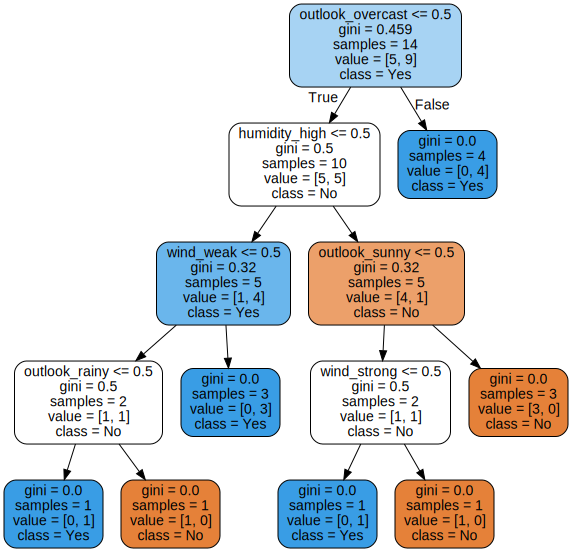

In [7]:
import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(tree_clf, out_file=None, 
                                feature_names=X.columns,  
                                class_names=['No','Yes'],
                                rounded=True,
                                filled=True)

graph = graphviz.Source(dot_data, format="png")
graph

In [35]:
import random as rd
for i in range(10):
  outlook = rd.choice(['sunny','rainy'])
  temperature = rd.choice(['hot','mild','cold'])
  x = pd.DataFrame({'outlook':outlook, 'temperature':temperature, 'humidity':['normal'], 'wind':['weak']})
  x = pd.get_dummies(x, columns=['outlook', 'temperature','humidity','wind'])
  
  x_new = pd.DataFrame(np.zeros((1, X.shape[1])), columns=X.columns)
  x_new[x == 1] = x
  y_pred = tree_clf.predict_proba(x_new)[0]
  label = tree_clf.predict(x_new)[0]

  print('probability no {}, yes {}'.format(y_pred[0], y_pred[1]))
  print('predicted label {}'.format(label))

probability no 0.0, yes 1.0
predicted label yes
probability no 0.0, yes 1.0
predicted label yes
probability no 0.0, yes 1.0
predicted label yes
probability no 0.0, yes 1.0
predicted label yes
probability no 0.0, yes 1.0
predicted label yes
probability no 0.0, yes 1.0
predicted label yes
probability no 0.0, yes 1.0
predicted label yes
probability no 0.0, yes 1.0
predicted label yes
probability no 0.0, yes 1.0
predicted label yes
probability no 0.0, yes 1.0
predicted label yes


In [34]:
a

,outlook_overcast,outlook_rainy,outlook_sunny,temperature_cool,temperature_hot,temperature_mild,humidity_high,humidity_normal,wind_strong,wind_weak
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
